# fbprophet

In [636]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet
import utils
import matplotlib
import matplotlib.pyplot as plt
from fbprophet.diagnostics import cross_validation

%matplotlib inline

In [668]:
def rmsle(y_pred, targ):
    log_vars = np.log(targ + 1) - np.log(y_pred + 1)
    return np.sqrt(np.square(log_vars).mean())

In [278]:
trn = pd.read_csv('./data/air_visit_data.csv')
trn = trn.rename({
    'visit_date': 'ds',
    'visitors': 'y'
}, axis='columns')
trn['y'] = np.log1p(trn.y)

In [279]:
trn.head()

,air_store_id,ds,y
0,air_ba937bf13d40fb24,2016-01-13,3.258097
1,air_ba937bf13d40fb24,2016-01-14,3.496508
2,air_ba937bf13d40fb24,2016-01-15,3.401197
3,air_ba937bf13d40fb24,2016-01-16,3.135494
4,air_ba937bf13d40fb24,2016-01-18,1.945910


In [358]:
test = pd.read_csv('./data/sample_submission.csv')
trn_like_test = utils.tes2trn(test)
test_time_df = trn_like_test[trn_like_test.air_store_id == 'air_00a91d42b08b08d9']
# test_time_df = test_time_df.drop(columns=['air_store_id'])
test_time_df = test_time_df.rename({'visit_date': 'ds'}, axis='columns')
test_time_df = test_time_df.drop(columns='air_store_id')
test_time_df.head()

,ds
0,2017-04-23
1,2017-04-24
2,2017-04-25
3,2017-04-26
4,2017-04-27


In [281]:
hol = pd.read_csv('./data/date_info.csv')
hol = hol.rename(
    {
        'calendar_date': 'Date',
    }, axis='columns')
hol.Date = pd.to_datetime(hol.Date)
hol = utils.add_ts_elapsed('holiday_flg', ['dur_'], hol)
calender = hol[['Date', 'holiday_flg', 'dur_holiday_flg']]
prophit_hol = calender[calender.holiday_flg == 1].rename({
    'dur_holiday_flg': 'holiday',
    'Date': 'ds'
},axis="columns").drop('holiday_flg', axis=1)
prophit_hol.holiday = prophit_hol.holiday.astype('str')

## Batch Train

In [296]:
result = pd.DataFrame()
stores = trn.groupby('air_store_id')
for i, store in stores:
    storeid = list(store.air_store_id.unique())[0]
#     print(store_df)
    print(str(count) + ' trainging :' + storeid)
    store = store.drop(columns=['air_store_id'])
    m = Prophet(holidays=prophit_hol, yearly_seasonality=False, daily_seasonality=False)
    m.fit(store)
    print(str(count) + 'predicting :' + storeid)
    forecast = m.predict(test_time_df)
    forecast['air_store_id'] = storeid
    forecast = forecast.rename({
        'ds':'visit_date',
        'yhat': 'visitors'
    }, axis='columns')
    forecast['visitors'] = np.exp(forecast.visitors) - 1
    count = count + 1
    result = result.append(forecast)

17 trainging :air_00a91d42b08b08d9
17predicting :air_00a91d42b08b08d9
18 trainging :air_0164b9927d20bcc3
18predicting :air_0164b9927d20bcc3
19 trainging :air_0241aa3964b7f861
19predicting :air_0241aa3964b7f861
20 trainging :air_0328696196e46f18
20predicting :air_0328696196e46f18
21 trainging :air_034a3d5b40d5b1b1
21predicting :air_034a3d5b40d5b1b1
22 trainging :air_036d4f1ee7285390
22predicting :air_036d4f1ee7285390
23 trainging :air_0382c794b73b51ad
23predicting :air_0382c794b73b51ad
24 trainging :air_03963426c9312048
24predicting :air_03963426c9312048
25 trainging :air_04341b588bde96cd
25predicting :air_04341b588bde96cd
26 trainging :air_049f6d5b402a31b2
26predicting :air_049f6d5b402a31b2
27 trainging :air_04cae7c1bc9b2a0b
27predicting :air_04cae7c1bc9b2a0b
28 trainging :air_0585011fa179bcce
28predicting :air_0585011fa179bcce
29 trainging :air_05c325d315cc17f5
29predicting :air_05c325d315cc17f5
30 trainging :air_0647f17b4dc041c8
30predicting :air_0647f17b4dc041c8
31 trainging :air_06

134 trainging :air_290e7a57b390f78e
134predicting :air_290e7a57b390f78e
135 trainging :air_298513175efdf261
135predicting :air_298513175efdf261
136 trainging :air_2a184c1745274b2b
136predicting :air_2a184c1745274b2b
137 trainging :air_2a24aec099333f39
137predicting :air_2a24aec099333f39
138 trainging :air_2a3743e37aab04b4
138predicting :air_2a3743e37aab04b4
139 trainging :air_2a485b92210c98b5
139predicting :air_2a485b92210c98b5
140 trainging :air_2a7f14da7fe0f699
140predicting :air_2a7f14da7fe0f699
141 trainging :air_2aab19554f91ff82
141predicting :air_2aab19554f91ff82
142 trainging :air_2ac361b97630e2df
142predicting :air_2ac361b97630e2df
143 trainging :air_2b8b29ddfd35018e
143predicting :air_2b8b29ddfd35018e
144 trainging :air_2b9bc9f5f5168ea1
144predicting :air_2b9bc9f5f5168ea1
145 trainging :air_2bffb19a24d11729
145predicting :air_2bffb19a24d11729
146 trainging :air_2c505f9ad67d4635
146predicting :air_2c505f9ad67d4635
147 trainging :air_2c6c79d597e48096
147predicting :air_2c6c79d59

248 trainging :air_4cab91146e3d1897
248predicting :air_4cab91146e3d1897
249 trainging :air_4cca5666eaf5c709
249predicting :air_4cca5666eaf5c709
250 trainging :air_4ce7b17062a1bf73
250predicting :air_4ce7b17062a1bf73
251 trainging :air_4d21676ed11f0bac
251predicting :air_4d21676ed11f0bac
252 trainging :air_4d71826793c09b22
252predicting :air_4d71826793c09b22
253 trainging :air_4d90a22572fa1ec9
253predicting :air_4d90a22572fa1ec9
254 trainging :air_4de6d887a7b1c1fc
254predicting :air_4de6d887a7b1c1fc
255 trainging :air_4dea8d17f6f59c56
255predicting :air_4dea8d17f6f59c56
256 trainging :air_4e1c38f68f435596
256predicting :air_4e1c38f68f435596
257 trainging :air_4f762e840b3996e1
257predicting :air_4f762e840b3996e1
258 trainging :air_4feeb8600f131e43
258predicting :air_4feeb8600f131e43
259 trainging :air_500641aca4cf673c
259predicting :air_500641aca4cf673c
260 trainging :air_506fe758114df773
260predicting :air_506fe758114df773
261 trainging :air_51281cd059d7b89b
261predicting :air_51281cd05

362 trainging :air_6ca1d941c8199a67
362predicting :air_6ca1d941c8199a67
363 trainging :air_6cbe54f0aa30b615
363predicting :air_6cbe54f0aa30b615
364 trainging :air_6ced51c24fb54262
364predicting :air_6ced51c24fb54262
365 trainging :air_6d64dba2edd4fc0c
365predicting :air_6d64dba2edd4fc0c
366 trainging :air_6d65542aa43b598b
366predicting :air_6d65542aa43b598b
367 trainging :air_6d65dd11d96e00fb
367predicting :air_6d65dd11d96e00fb
368 trainging :air_6e06824d0934dd81
368predicting :air_6e06824d0934dd81
369 trainging :air_6e3fd96320d24324
369predicting :air_6e3fd96320d24324
370 trainging :air_6e64fb5821402cd2
370predicting :air_6e64fb5821402cd2
371 trainging :air_6ff5fca957798daa
371predicting :air_6ff5fca957798daa
372 trainging :air_707d4b6328f2c2df
372predicting :air_707d4b6328f2c2df
373 trainging :air_709262d948dd0b6e
373predicting :air_709262d948dd0b6e
374 trainging :air_70e9e8cd55879414
374predicting :air_70e9e8cd55879414
375 trainging :air_70f834596eb99fee
375predicting :air_70f834596

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


470 trainging :air_900d755ebd2f7bbd
470predicting :air_900d755ebd2f7bbd
471 trainging :air_901925b628677c2e
471predicting :air_901925b628677c2e
472 trainging :air_90213bcae4afa274
472predicting :air_90213bcae4afa274
473 trainging :air_90bd5de52c166767
473predicting :air_90bd5de52c166767
474 trainging :air_90ed0a2f24755533
474predicting :air_90ed0a2f24755533
475 trainging :air_90f0efbb702d77b7
475predicting :air_90f0efbb702d77b7
476 trainging :air_9105a29b0eb250d2
476predicting :air_9105a29b0eb250d2
477 trainging :air_91236b89d29567af
477predicting :air_91236b89d29567af
478 trainging :air_9152d9926e5c4a3a
478predicting :air_9152d9926e5c4a3a
479 trainging :air_915558a55c2bc56c
479predicting :air_915558a55c2bc56c
480 trainging :air_91beafbba9382b0a
480predicting :air_91beafbba9382b0a
481 trainging :air_91d72e16c4bcba55
481predicting :air_91d72e16c4bcba55
482 trainging :air_9241121af22ff1d6
482predicting :air_9241121af22ff1d6
483 trainging :air_929d8513e3cdb423
483predicting :air_929d8513e

584 trainging :air_aed3a8b49abe4a48
584predicting :air_aed3a8b49abe4a48
585 trainging :air_af03c277a167b2bd
585predicting :air_af03c277a167b2bd
586 trainging :air_af24e3e817dea1e5
586predicting :air_af24e3e817dea1e5
587 trainging :air_af63df35857b16e6
587predicting :air_af63df35857b16e6
588 trainging :air_b0a6a4c5e95c74cf
588predicting :air_b0a6a4c5e95c74cf
589 trainging :air_b162fb07fbbdea33
589predicting :air_b162fb07fbbdea33
590 trainging :air_b192fb5310436005
590predicting :air_b192fb5310436005
591 trainging :air_b1a72bf1ebf4b8ef
591predicting :air_b1a72bf1ebf4b8ef
592 trainging :air_b1bb1fae86617d7a
592predicting :air_b1bb1fae86617d7a
593 trainging :air_b1d822f75c9fc615
593predicting :air_b1d822f75c9fc615
594 trainging :air_b2395df0e874078d
594predicting :air_b2395df0e874078d
595 trainging :air_b23d0f519291247d
595predicting :air_b23d0f519291247d
596 trainging :air_b259b4e4a51a690d
596predicting :air_b259b4e4a51a690d
597 trainging :air_b28bed4b2e7167b7
597predicting :air_b28bed4b2

698 trainging :air_d00a15343325e5f7
698predicting :air_d00a15343325e5f7
699 trainging :air_d07e57b21109304a
699predicting :air_d07e57b21109304a
700 trainging :air_d0a1e69685259c92
700predicting :air_d0a1e69685259c92
701 trainging :air_d0a7bd3339c3d12a
701predicting :air_d0a7bd3339c3d12a
702 trainging :air_d0e8a085d8dc83aa
702predicting :air_d0e8a085d8dc83aa
703 trainging :air_d138b593ebda55cc
703predicting :air_d138b593ebda55cc
704 trainging :air_d1418d6fd6d634f2
704predicting :air_d1418d6fd6d634f2
705 trainging :air_d186b2cb0b9ce022
705predicting :air_d186b2cb0b9ce022
706 trainging :air_d1f20424f76cc78e
706predicting :air_d1f20424f76cc78e
707 trainging :air_d34c0861a2be94cb
707predicting :air_d34c0861a2be94cb
708 trainging :air_d3e7b5952cd09ccb
708predicting :air_d3e7b5952cd09ccb
709 trainging :air_d44d210d2994f01b
709predicting :air_d44d210d2994f01b
710 trainging :air_d473620754bf9fc2
710predicting :air_d473620754bf9fc2
711 trainging :air_d477b6339b8ce69f
711predicting :air_d477b6339

812 trainging :air_f3f9824b7d70c3cf
812predicting :air_f3f9824b7d70c3cf
813 trainging :air_f4936b91c9addbf0
813predicting :air_f4936b91c9addbf0
814 trainging :air_f593fa60ac3541e2
814predicting :air_f593fa60ac3541e2
815 trainging :air_f690c42545146e0a
815predicting :air_f690c42545146e0a
816 trainging :air_f6b2489ccf873c3b
816predicting :air_f6b2489ccf873c3b
817 trainging :air_f6bfd27e2e174d16
817predicting :air_f6bfd27e2e174d16
818 trainging :air_f6cdaf7b7fdc6d78
818predicting :air_f6cdaf7b7fdc6d78
819 trainging :air_f8233ad00755c35c
819predicting :air_f8233ad00755c35c
820 trainging :air_f85e21e543cf44f2
820predicting :air_f85e21e543cf44f2
821 trainging :air_f88898cd09f40496
821predicting :air_f88898cd09f40496
822 trainging :air_f911308e19d64236
822predicting :air_f911308e19d64236
823 trainging :air_f9168b23fdfc1e52
823predicting :air_f9168b23fdfc1e52
824 trainging :air_f927b2da69a82341
824predicting :air_f927b2da69a82341
825 trainging :air_f957c6d6467d4d90
825predicting :air_f957c6d64

In [297]:
result.to_csv('./result/pp_result_2.csv')

In [298]:
result['visit_date'] = result['visit_date'].astype('str')

In [347]:
result.air_store_id.unique()

array(['air_00a91d42b08b08d9', 'air_0164b9927d20bcc3',
       'air_0241aa3964b7f861', 'air_0328696196e46f18',
       'air_034a3d5b40d5b1b1', 'air_036d4f1ee7285390',
       'air_0382c794b73b51ad', 'air_03963426c9312048',
       'air_04341b588bde96cd', 'air_049f6d5b402a31b2',
       'air_04cae7c1bc9b2a0b', 'air_0585011fa179bcce',
       'air_05c325d315cc17f5', 'air_0647f17b4dc041c8',
       'air_064e203265ee5753', 'air_066f0221b8a4d533',
       'air_06f95ac5c33aca10', 'air_0728814bd98f7367',
       'air_0768ab3910f7967f', 'air_07b314d83059c4d2',
       'air_07bb665f9cdfbdfb', 'air_082908692355165e',
       'air_083ddc520ea47e1e', 'air_0845d8395f30c6bb',
       'air_084d98859256acf0', 'air_0867f7bebad6a649',
       'air_08ba8cd01b3ba010', 'air_08cb3c4ee6cd6a22',
       'air_08ef81d5b7a0d13f', 'air_08f994758a1e76d4',
       'air_09040f6df960ddb8', 'air_0919d54f0c9a24b8',
       'air_09661c0f3259cc04', 'air_09a845d5b5944b01',
       'air_09fd1f5c58583141', 'air_0a74a5408a0b8642',
       'ai

In [299]:
def trn2test(tes_in_trn):
    tes_in_trn['id'] = tes_in_trn[['air_store_id', 'visit_date']].apply(
        lambda x: '_'.join(x), axis=1)
    return tes_in_trn[['id', 'visitors']]

In [300]:
fr = trn2test(result[['air_store_id', 'visit_date', 'visitors']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [327]:
fr.to_csv('./result/pp_submission.csv', index=False)

In [356]:
final_result = pd.merge(test.drop(columns=['visitors']), fr, how='left')

In [366]:
final_result.to_csv('./result/pp_submission.csv', index=False)

In [365]:
final_result.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,2.713417
1,air_00a91d42b08b08d9_2017-04-24,22.902539
2,air_00a91d42b08b08d9_2017-04-25,24.945218
3,air_00a91d42b08b08d9_2017-04-26,30.442141
4,air_00a91d42b08b08d9_2017-04-27,32.736847


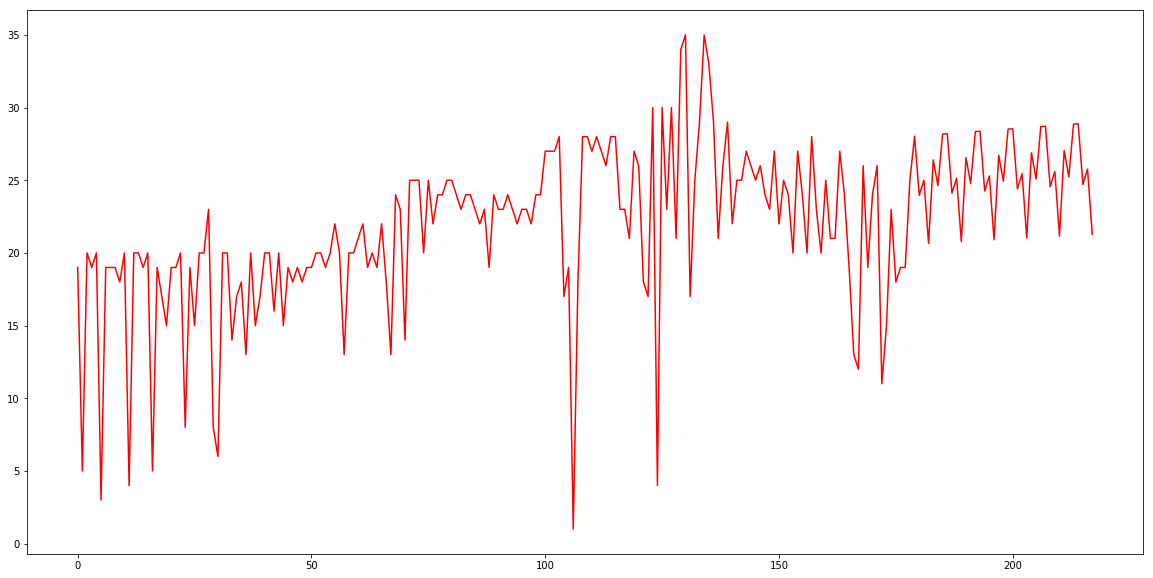

In [326]:
store_id = 'air_47beaffd3806c979'
store1 = data[data.air_store_id == store_id]
store1 = store1.drop(columns=['air_store_id'])
store1_predict = result[result.air_store_id == store_id]
# store1_predict.head()
store1.head()
total = pd.concat([store1.visitors, store1_predict.visitors])
plt.figure(figsize=(20, 10))
plt.plot(total.values, 'r')

# Tuning

In [589]:
# 3-12, 4-22

In [856]:
data = pd.read_csv('./data/air_visit_data.csv')
data = data.rename({
    'visit_date': 'ds',
    'visitors': 'y'
}, axis='columns')
data['y'] = np.log(data.y)
stores = data.air_store_id.unique()
hol = pd.read_csv('./data/date_info.csv')
hol = hol.rename(
    {
        'calendar_date': 'Date',
    }, axis='columns')
hol.Date = pd.to_datetime(hol.Date)
hol = utils.add_ts_elapsed('holiday_flg', ['dur_'], hol)
calender = hol[['Date', 'holiday_flg', 'dur_holiday_flg']]
prophit_hol = calender[calender.holiday_flg == 1].rename({
    'dur_holiday_flg': 'holiday',
    'Date': 'ds'
},axis="columns").drop('holiday_flg', axis=1)
prophit_hol.holiday = prophit_hol.holiday.astype('str')

In [857]:
trn_set = data[data.ds < '2017-03-12']
valid_set = data[data.ds >= '2017-03-12']
len(trn_set), len(valid_set)

(222073, 30035)

In [858]:
demo_store_id = stores[1]
demo_store_id

'air_25e9888d30b386df'

In [932]:
def testAStore(demo_store_id):
#     return None
#     global result_df, count
#     print(' testing ' + demo_store_id)
#     count = count + 1
    trn = trn_set[trn_set.air_store_id == demo_store_id].copy()
    valid = valid_set[valid_set.air_store_id == demo_store_id].copy()
    cap = np.max(store.y)
    fl = np.min(store[store.y > 0].y)
    trn['cap'] = cap
    trn['floor'] = fl

    m0 = Prophet(holidays=prophit_hol, 
                yearly_seasonality=False,
                daily_seasonality=False,
                weekly_seasonality=True)

    m1 = Prophet(holidays=prophit_hol, 
                yearly_seasonality=False,
                daily_seasonality=False,
                weekly_seasonality=True,
                growth='logistic')

    m2 = Prophet(holidays=prophit_hol, 
                yearly_seasonality=True,
                daily_seasonality=False,
                weekly_seasonality=True)
    
#     m3 = Prophet(holidays=prophit_hol, 
#                 yearly_seasonality=False,
#                 daily_seasonality=False,
#                 weekly_seasonality=True,
#                 growth='logistic')
    
    m0.fit(trn)
    m1.fit(trn)
    m2.fit(trn)
    
#     m3.fit(trn)

    # df_cv1 = cross_validation(m1, horizon = '40 days')
    # df_cv2 = cross_validation(m2, horizon = '40 days')
    
    valid0 = m0.make_future_dataframe(periods=len(valid))

    valid1 = m1.make_future_dataframe(periods=len(valid))
    valid1['cap'] = cap
    valid1['floor'] = fl

    valid2 = m2.make_future_dataframe(periods=len(valid))

    forecast0 = m0.predict(valid0)
    forecast1 = m1.predict(valid1)
    forecast2 = m2.predict(valid2)
    
    tloss0 = rmsle(np.exp(forecast0[:(len(forecast1)-len(valid))].yhat.values), np.exp(trn.y.values))
    tloss1 = rmsle(np.exp(forecast1[:(len(forecast1)-len(valid))].yhat.values), np.exp(trn.y.values))
    tloss2 = rmsle(np.exp(forecast2[:(len(forecast2)-len(valid))].yhat.values), np.exp(trn.y.values))
    
    loss0 = rmsle(np.exp(forecast0[(len(forecast1)-len(valid)):].yhat.values), np.exp(valid.y.values))
    loss1 = rmsle(np.exp(forecast1[(len(forecast1)-len(valid)):].yhat.values), np.exp(valid.y.values))
    loss2 = rmsle(np.exp(forecast2[(len(forecast2)-len(valid)):].yhat.values), np.exp(valid.y.values))
    
    return {
        'aire_store_id': demo_store_id, 
        'train_loss0': tloss0,
        'test_loss0': loss0,
        'train_loss1': tloss1, 
        'test_loss1': loss1, 
        'train_loss2': tloss2, 
        'test_loss2':loss2,
        
    }

In [ ]:
## pridect mul
result = {}
from multiprocessing import Pool
concurrency = 3
step_task = 1
num_tasks = len(stores)
with Pool(concurrency) as pool:
    for i, res in enumerate(pool.imap(testAStore, stores), 1):
        result[i] = res
        if i % step_task == 0:
            print("progress={} %".format(i/num_tasks*100))

progress=0.12062726176115801 %
progress=0.24125452352231602 %
progress=0.3618817852834741 %
progress=0.48250904704463204 %
progress=0.6031363088057901 %
progress=0.7237635705669482 %
progress=0.8443908323281062 %
progress=0.9650180940892641 %
progress=1.0856453558504222 %
progress=1.2062726176115801 %
progress=1.3268998793727382 %
progress=1.4475271411338964 %
progress=1.5681544028950543 %


In [930]:
result

{1: {'aire_store_id': 'air_ba937bf13d40fb24',
  'test_loss0': 0.96858374412981896,
  'test_loss1': 0.98745801086283558,
  'test_loss2': 0.97823157231930991,
  'train_loss0': 0.39361929766818976,
  'train_loss1': 0.41237928351727404,
  'train_loss2': 0.38590393347154217}}

In [871]:
tloss1 = rmsle(np.exp(forecast1[:(len(forecast1)-len(valid))].yhat.values), np.exp(trn.y.values))
tloss2 = rmsle(np.exp(forecast2[:(len(forecast2)-len(valid))].yhat.values), np.exp(trn.y.values))

loss1 = rmsle(np.exp(forecast1[(len(forecast1)-len(valid)):].yhat.values), np.exp(valid.y.values))
loss2 = rmsle(np.exp(forecast2[(len(forecast2)-len(valid)):].yhat.values), np.exp(valid.y.values))

print('train loss 1: ' + str(tloss1) + ', loss2: ' + str(tloss2))
print('valid loss 1: ' + str(loss1) + ', loss2: ' + str(loss2))

train loss 1: 0.618893570594, loss2: 0.58273947085
valid loss 1: 0.797403484778, loss2: 0.972676254446


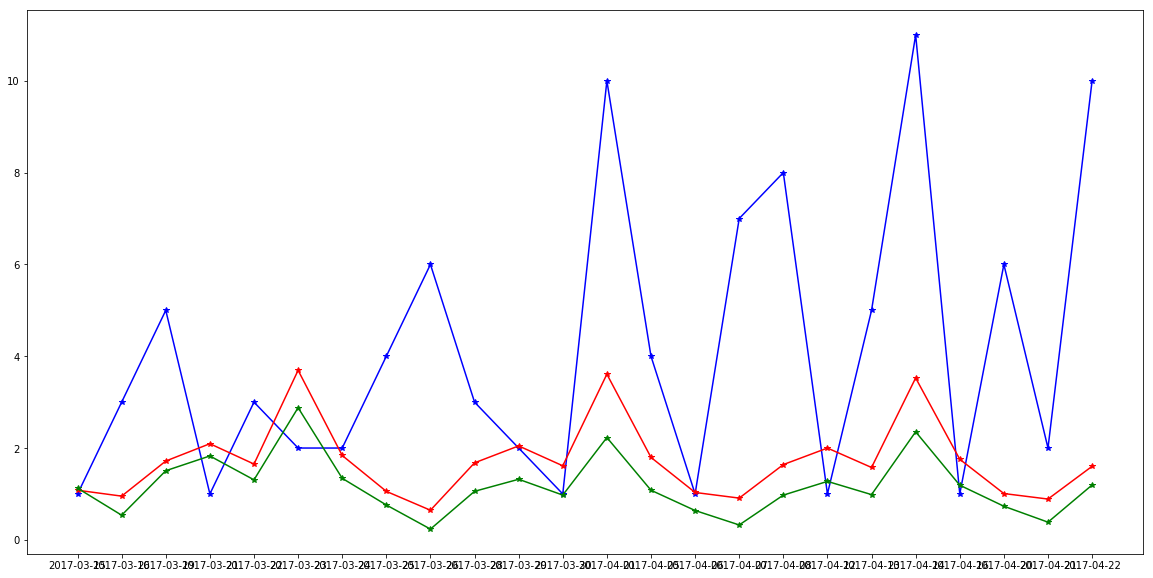

In [872]:
plt.figure(figsize=(20, 10))
plt.plot(valid.ds, np.exp(valid.y.values), 'b*-')
plt.plot(valid.ds, np.exp(forecast1[(len(forecast1)-len(valid)):].yhat.values), 'r*-')
plt.plot(valid.ds, np.exp(forecast2[(len(forecast1)-len(valid)):].yhat.values), 'g*-')

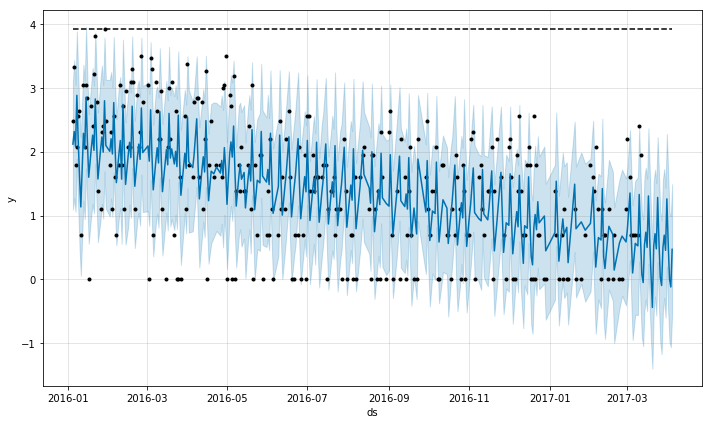

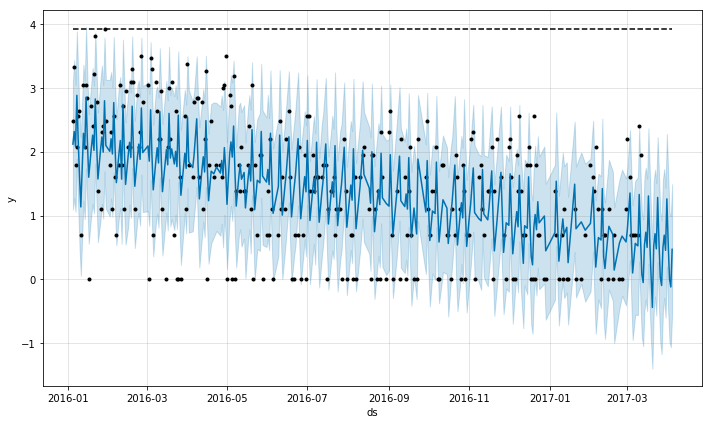

In [873]:
m1.plot(forecast1)

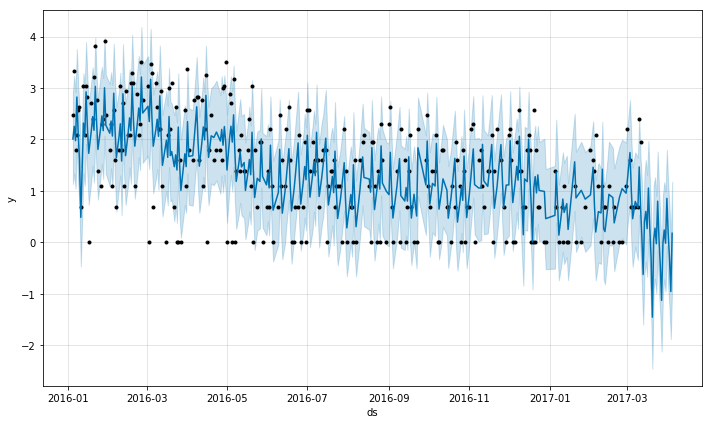

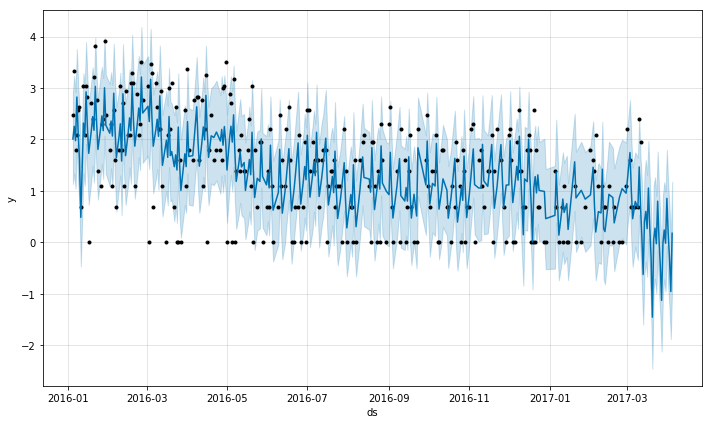

In [874]:
m2.plot(forecast2)

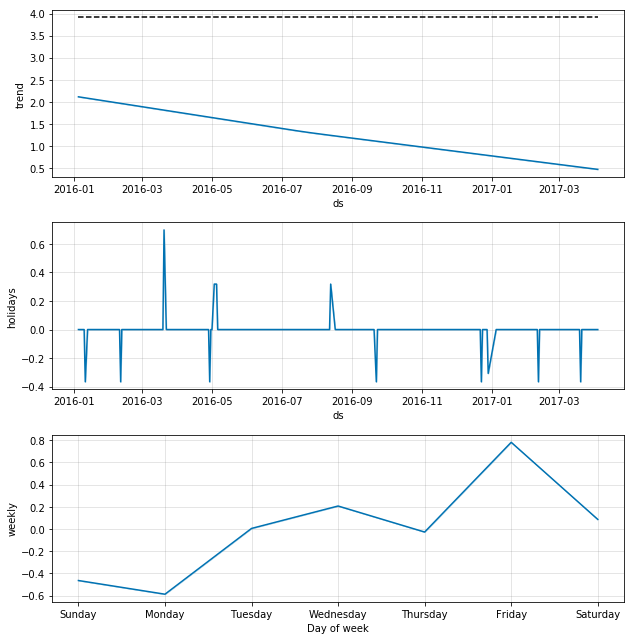

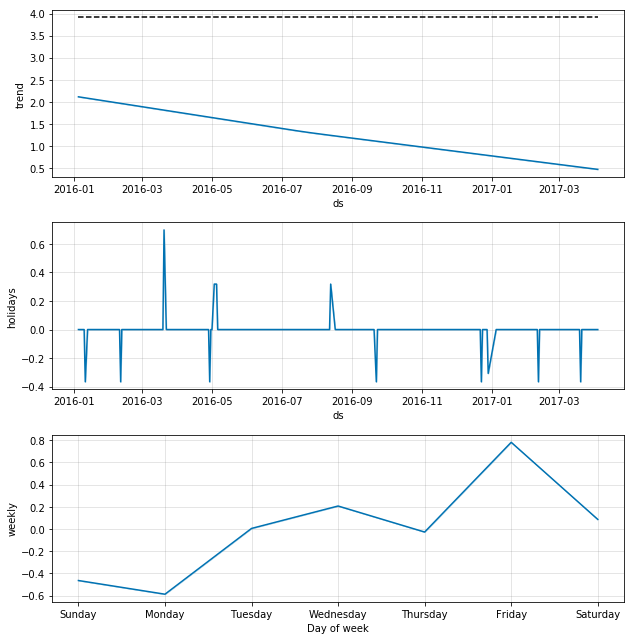

In [869]:
m1.plot_components(forecast1)

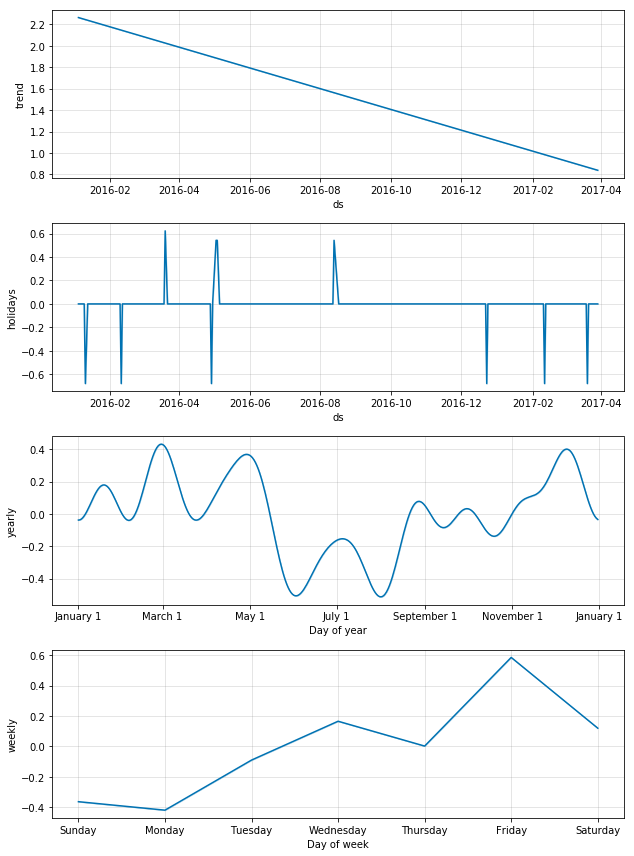

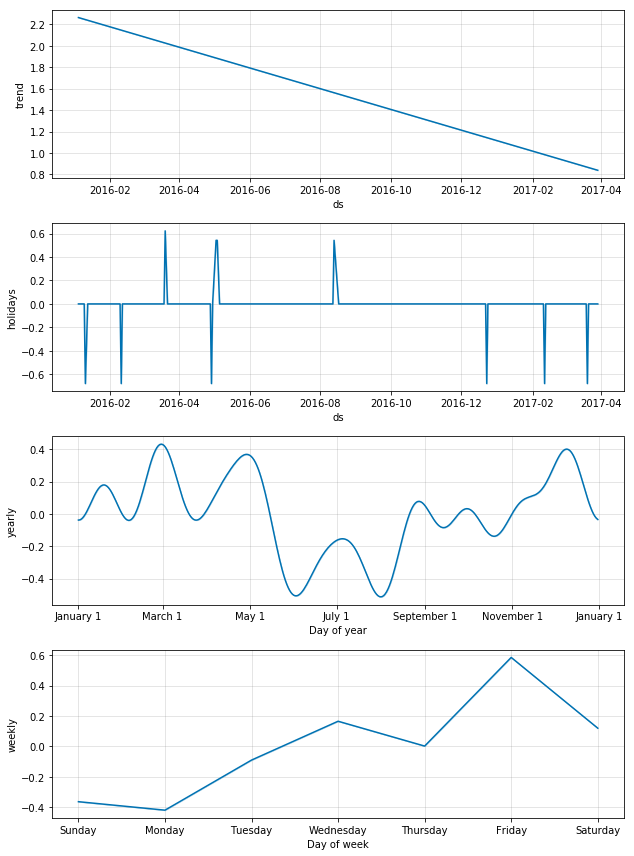

In [855]:
m2.plot_components(forecast2)